<a href="https://colab.research.google.com/github/hbeck118/GIS/blob/main/percentage_sl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#uploading data for total population per county so I can calculate percentage of foreign born population from https://de.statista.com/statistik/daten/studie/1109841/umfrage/einwohnerzahl-bezirke-berlin/
#code to read column with county code as string so it doesn't delete the first 0 from chat gpt
gerpop=pd.read_excel('https://raw.githubusercontent.com/hbeck118/GIS/main/pop_county_ger.xlsx', dtype={'Schlüssel-nummer': str})

In [ ]:
gerpop['county_code']=gerpop['Schlüssel-nummer']
gerpop['county_code']=gerpop['county_code'].str.strip()

In [ ]:
#merging total population data with social support data and calculating a percentage
merged_sl_pop = pd.merge(ger_sl_final, gerpop, on='county_code', how='outer', indicator=True)
merged_sl_pop['percentage social support']= merged_sl_pop['Empfänger von Hilfe zum Lebensunterhalt'] / merged_sl_pop['Bevölkerung Insegesamt '] * 100
merged_sl_pop[['county_code','Empfänger von Hilfe zum Lebensunterhalt', 'Bevölkerung Insegesamt ', 'percentage social support', '_merge']]

,county_code,Empfänger von Hilfe zum Lebensunterhalt,Bevölkerung Insegesamt,percentage social support,_merge
0,01,NaN,NaN,NaN,right_only
1,01001,455.0,92550.0,0.491626,both
2,01002,865.0,247717.0,0.349189,both
3,01003,890.0,218095.0,0.408079,both
4,01004,395.0,79502.0,0.496843,both
...,...,...,...,...,...
468,NaN,NaN,992666.0,NaN,right_only
469,NaN,NaN,2573135.0,NaN,right_only
470,NaN,NaN,1628378.0,NaN,right_only
471,NaN,NaN,4086152.0,NaN,right_only


In [ ]:
sl_pop_map = pd.merge(ger0, merged_sl_pop, on='county_code',how='outer',indicator='merge')
sl_pop_map[['county_code','_merge', 'percentage social support']]

sl_pop_map_final = pd.merge(ger0, merged_sl_pop, on='county_code',how='inner',indicator=False)

,county_code,_merge,percentage social support
0,01,right_only,NaN
1,01001,both,0.491626
2,01002,both,0.349189
3,01003,both,0.408079
4,01004,both,0.496843
...,...,...,...
468,NaN,right_only,NaN
469,NaN,right_only,NaN
470,NaN,right_only,NaN
471,NaN,right_only,NaN


<Axes: >

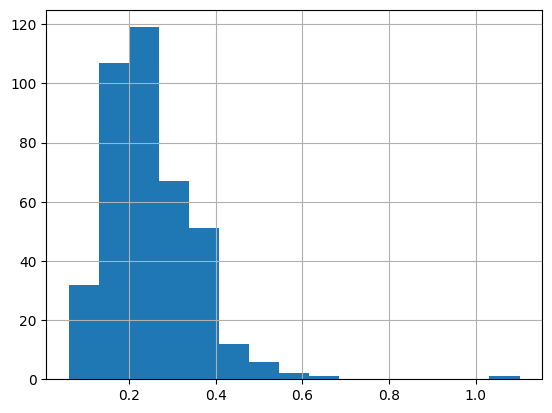

In [ ]:
sl_pop_map_final['percentage social support'].hist(bins=15)

In [ ]:
gdf_sl = gpd.GeoDataFrame(sl_pop_map_final)

<Axes: >

[]

[]

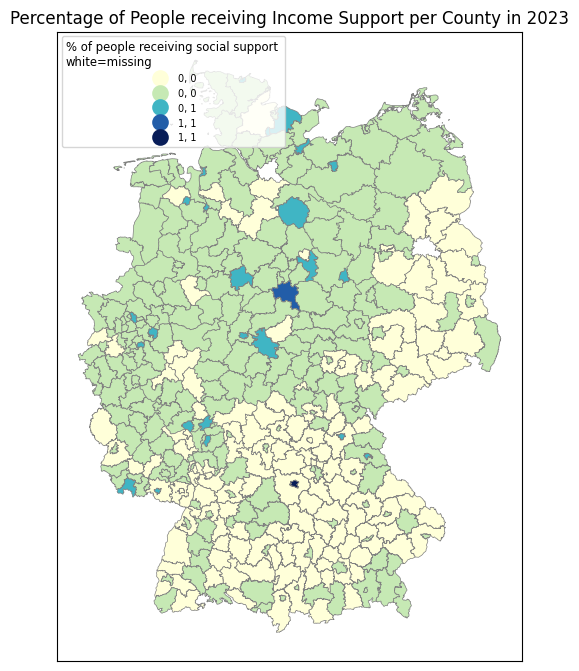

In [ ]:
gdf_sl = gpd.GeoDataFrame(sl_pop_map_final)
gdf_sl.set_geometry('geometry_x', inplace=True)

fig, ax = plt.subplots(1, figsize=(6,10))
gdf_sl.plot(ax=ax,column='percentage social support',legend=True,cmap='YlGnBu',
          scheme="user_defined", classification_kwds={'bins':[0.2, 0.4, 0.6, 1.0]}, k=5, edgecolor='grey',linewidth=0.5,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper left', 'markerscale':1.2,'title_fontsize':'small','fontsize':'7'})
leg1 = ax.get_legend()
leg1.set_title('''% of people receiving social support \nwhite=missing''')

ax.title.set_text("Percentage of People receiving Income Support per County in 2023")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks